# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df['TARGET CLASS'].unique()

array([1, 0], dtype=int64)

In [6]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
df.shape

(1000, 11)

In [11]:
df.mean()

WTT             0.949682
PTI             1.114303
EQW             0.834127
SBI             0.682099
LQE             1.032336
QWG             0.943534
FDJ             0.963422
PJF             1.071960
HQE             1.158251
NXJ             1.362725
TARGET CLASS    0.500000
dtype: float64

In [ ]:
x =df.drop('TARGET CLASS',axis=1)

In [12]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(x)

In [14]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [15]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
df_feat.mean()

WTT    1.394440e-16
PTI   -2.658984e-16
EQW   -9.992007e-17
SBI   -1.432188e-16
LQE   -6.134537e-16
QWG    2.486900e-17
FDJ    6.682432e-16
PJF   -4.778400e-16
HQE    3.358980e-16
NXJ    4.650169e-16
dtype: float64

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=40)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[140  16]
 [  8 136]]


In [34]:
1-((140+136)/300)

0.07999999999999996

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [35]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

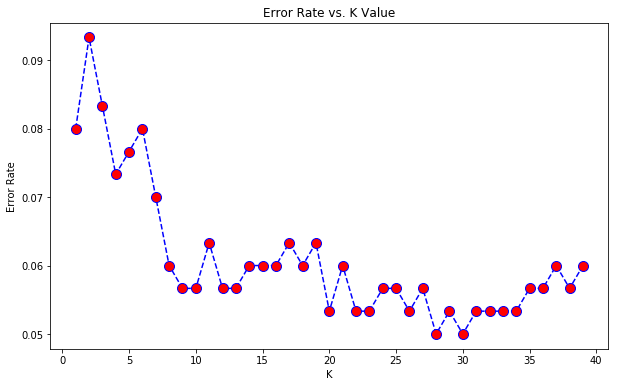

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))

WITH K=1


[[140  16]
 [  8 136]]


In [42]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))

WITH K=20


[[145  11]
 [  5 139]]


In [38]:
(145+139)/300

0.9466666666666667

# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!